# Titanic - Machine Learning from Disaster

This dataset is from the Kaggle competition [Titanic - Machine Learning from Disaster](https://www.kaggle.com/c/titanic). The goal is to predict whether a passenger survived the sinking of the Titanic or not. 

![Titanic - Image](titanic.png)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Set seeds for reproducibility
np.random.seed(42)

print("Setup complete!")

Setup complete!


## 1. Load Data

The data has been split into two groups:
- training set (train.csv)
- test set (test.csv)

The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

### **1.1 Overview**
* `PassengerId` is the unique id of the row and it doesn't have any effect on target
* `Survived` is the target variable we are trying to predict (**0** or **1**):
    - **1 = Survived**
    - **0 = Not Survived**
* `Pclass` (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**):
    - **1 = Upper Class**
    - **2 = Middle Class**
    - **3 = Lower Class**
* `Name`, `Sex` and `Age` are self-explanatory
* `SibSp` is the total number of the passengers' siblings and spouse
* `Parch` is the total number of the passengers' parents and children
* `Ticket` is the ticket number of the passenger
* `Fare` is the passenger fare
* `Cabin` is the cabin number of the passenger
* `Embarked` is port of embarkation and it is a categorical feature which has **3** unique values (**C**, **Q** or **S**):
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

In [2]:
# Load data from Titanic dataset
train_df = pd.read_csv('titanic_dataset/train.csv')
test_df = pd.read_csv('titanic_dataset/test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Print shapes of the train and test dataframes
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (891, 12)
Test shape: (418, 11)


Get more information abaout dataset columns.

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Analyse Pclass Feature.

In [6]:
# Get the number of people per class and precentage of how many people survived for each class
train_df.groupby("Pclass")["Survived"].agg(["mean", "count"])

,mean,count
Pclass,,
1,0.629630,216
2,0.472826,184
3,0.242363,491


<Axes: xlabel='Pclass', ylabel='Survived'>

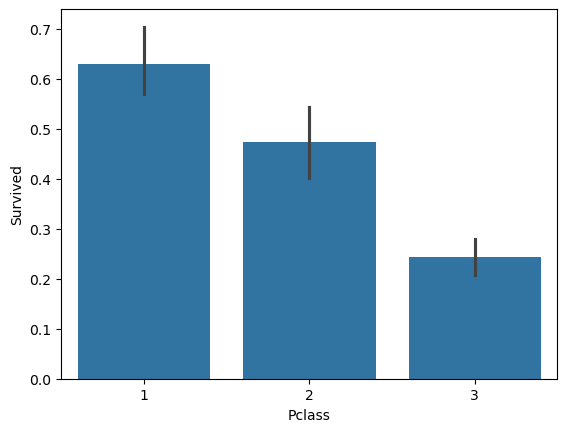

In [7]:
# Plot relationship between class and survival
sns.barplot(data=train_df, x="Pclass", y="Survived")

Analyse Sex Feature.

In [8]:
# Get the number of people per gender aYOUR CODE HERE

,mean,count
Sex,,
female,0.742038,314
male,0.188908,577


<Axes: xlabel='Sex', ylabel='Survived'>

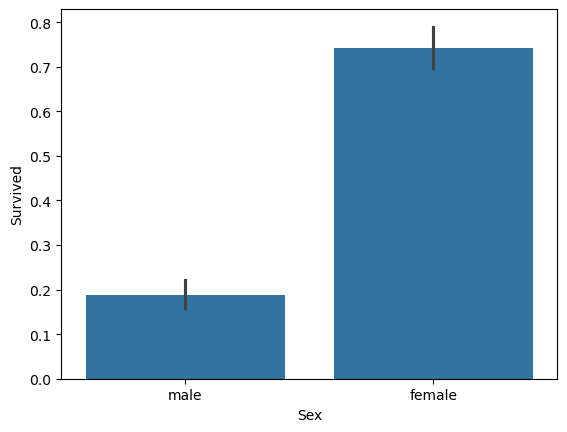

In [9]:
# Plot relationship between gender and survival
sns.barplot(data=train_df, x="Sex", y="Survived")

Analyse Age Feature.

<Axes: xlabel='Age', ylabel='Count'>

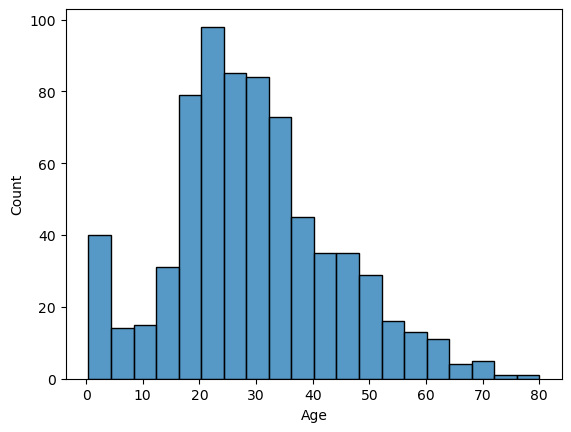

In [10]:
# Plot the distribution of the Age column
sns.histplot(train_df["Age"], bins=20, kde=False)

<Axes: title={'center': 'Survival Count by Age'}, xlabel='Age', ylabel='Count'>

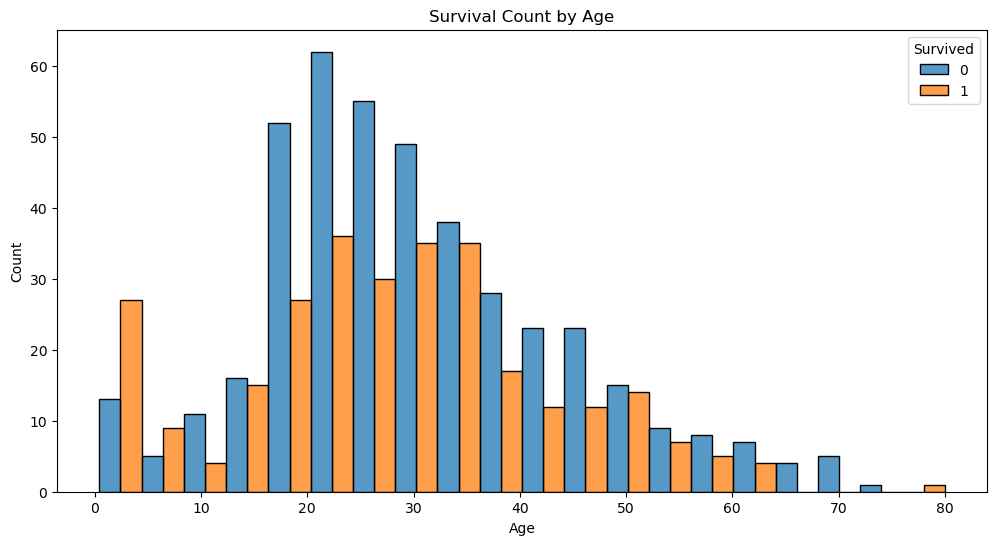

In [11]:
# Plot the distribution of the Age column for each class
plt.figure(figsize=(12, 6))
plt.title("Survival Count by Age")
sns.histplot(data=train_df, x="Age", hue="Survived", kde=False, multiple="dodge")

In [12]:
# Get the number of people per SibSp and precentage of how many people survived for each SibSp value
train_df.groupby("SibSp")["Survived"].agg(["mean", "count"])

,mean,count
SibSp,,
0,0.345395,608
1,0.535885,209
2,0.464286,28
3,0.250000,16
4,0.166667,18
5,0.000000,5
8,0.000000,7


In [13]:
# Get the number of people per Parch and precentage of how many people survived for each Parch value
train_df.groupby("Parch")["Survived"].agg(["mean", "count"])

,mean,count
Parch,,
0,0.343658,678
1,0.550847,118
2,0.500000,80
3,0.600000,5
4,0.000000,4
5,0.200000,5
6,0.000000,1


<Axes: xlabel='Fare', ylabel='Count'>

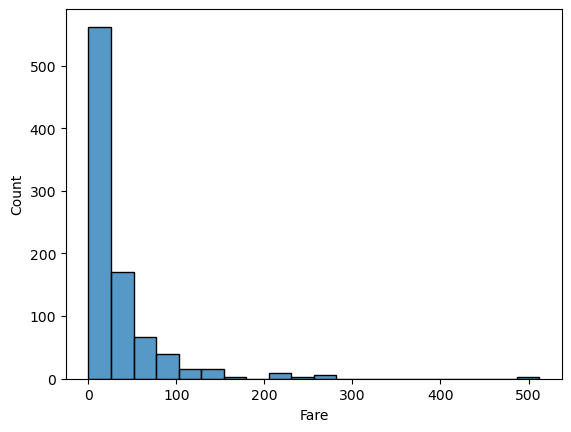

In [14]:
# Plot distribution of Fare column
sns.histplot(data=train_df, x="Fare", kde=False, bins=20)

<Axes: title={'center': 'Survival Count by Fare Paid'}, xlabel='Fare', ylabel='Count'>

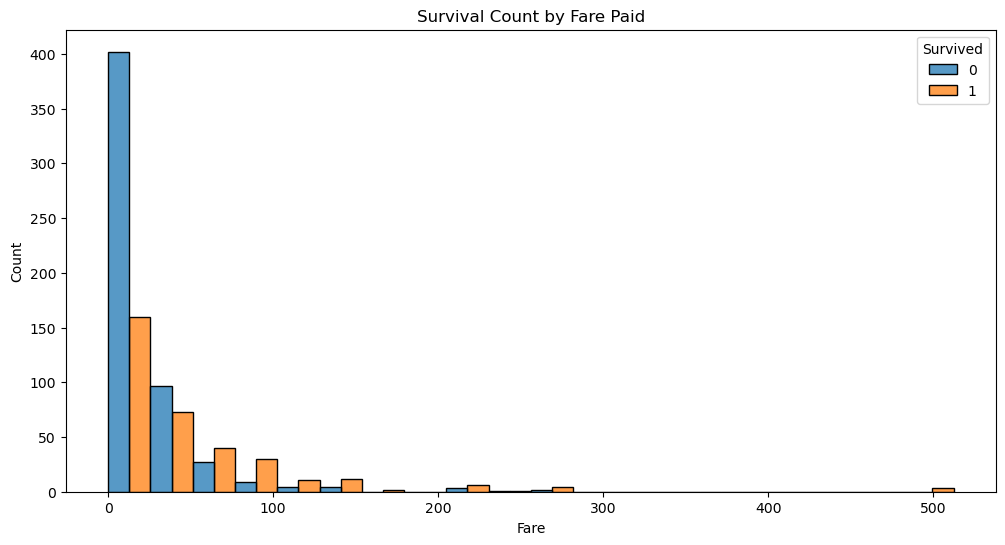

In [15]:
# Plot distribution of Fare column for each class (survived vs not survived)
plt.figure(figsize=(12, 6))
plt.title("Survival Count by Fare Paid")
sns.histplot(data=train_df, x="Fare", hue="Survived", kde=False, multiple="dodge", bins=20)

In [16]:
# Value count for Cabin column
train_df["Cabin"].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [17]:
# Get the number of people per embarked place and precentage of how many people survived for each embarked place
train_df.groupby("Embarked")["Survived"].agg(["mean", "count"])

,mean,count
Embarked,,
C,0.553571,168
Q,0.389610,77
S,0.336957,644


<Axes: xlabel='Embarked', ylabel='Survived'>

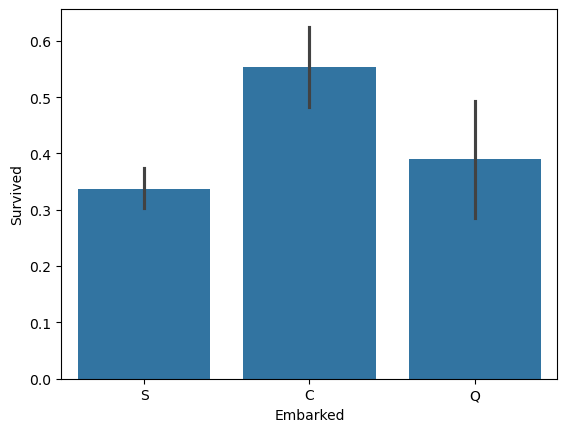

In [18]:
# Plot relationship between embarked place and survival
sns.barplot(data=train_df, x="Embarked", y="Survived")

## 2. Preprocessing

In this step we select the features that we will use in our model. Beside that we need to impute missing values and encode categorical features. Also some additional feature engineering can be done (merging columns, creating new features using existing ones, etc.).

In [19]:
# Drop columns PassengerId, Name and Ticket
columns_to_drop = ["PassengerId", "Name", "Ticket"]
train_df.drop(columns_to_drop, axis=1, inplace=True)
test_df.drop(columns_to_drop, axis=1, inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     204 non-null    object 
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [21]:
# Get FamilySize by adding SibSp, Parch and 1 (for the person itself)
train_df["FamilySize"] = train_df["SibSp"] + train_df["Parch"] + 1
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1
# Add the feature if the person is alone or not
train_df["Alone"] = train_df["FamilySize"].apply(lambda x: 1 if x == 1 else 0)
test_df["Alone"] = test_df["FamilySize"].apply(lambda x: 1 if x == 1 else 0)
# Drop SibSp and Parch columns
train_df.drop(["SibSp", "Parch"], axis=1, inplace=True)
test_df.drop(["SibSp", "Parch"], axis=1, inplace=True)
# Create CabinBool feature (1 if not null, 0 otherwise)
train_df["CabinBool"] = train_df["Cabin"].apply(lambda x: 0 if pd.isna(x) else 1)
test_df["CabinBool"] = test_df["Cabin"].apply(lambda x: 0 if pd.isna(x) else 1)
# Drop Cabin column
train_df.drop("Cabin", axis=1, inplace=True)
test_df.drop("Cabin", axis=1, inplace=True)
# Check the new columns
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,Alone,CabinBool
0,0,3,male,22.0,7.2500,S,2,0,0
1,1,1,female,38.0,71.2833,C,2,0,1
2,1,3,female,26.0,7.9250,S,1,1,0
3,1,1,female,35.0,53.1000,S,2,0,1
4,0,3,male,35.0,8.0500,S,1,1,0


<Axes: xlabel='Alone', ylabel='Survived'>

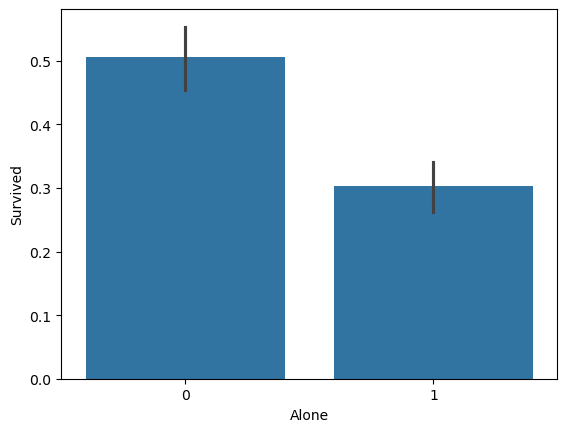

In [22]:
# Plot relationship between Alone column and survival
sns.barplot(data=train_df, x="Alone", y="Survived")

<Axes: xlabel='CabinBool', ylabel='Survived'>

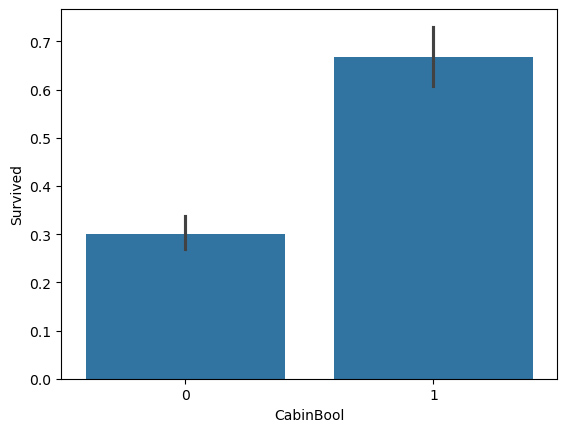

In [23]:
# Plot relationship between CabinBool column and survival
sns.barplot(data=train_df, x="CabinBool", y="Survived")

Convert categorical features to numerical features

In [24]:
# Convert categorical features to numerical features
train_df["Sex"] = train_df["Sex"].apply(lambda x: 1 if x == "male" else 0)
test_df["Sex"] = test_df["Sex"].apply(lambda x: 1 if x == "male" else 0)
# One-hot encode Embarked feature
train_df = pd.get_dummies(train_df, columns=["Embarked"], dummy_na=False, dtype=np.int64)
test_df = pd.get_dummies(test_df, columns=["Embarked"], dummy_na=False, dtype=np.int64)

# Check the new columns
train_df.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Alone,CabinBool,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,2,0,0,0,0,1
1,1,1,0,38.0,71.2833,2,0,1,1,0,0
2,1,3,0,26.0,7.9250,1,1,0,0,0,1
3,1,1,0,35.0,53.1000,2,0,1,0,0,1
4,0,3,1,35.0,8.0500,1,1,0,0,0,1


In [25]:
# Check columns with null values
train_df.isnull().sum()

Survived        0
Pclass          0
Sex             0
Age           177
Fare            0
FamilySize      0
Alone           0
CabinBool       0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [26]:
# Check columns with null values
test_df.isnull().sum()

Pclass         0
Sex            0
Age           86
Fare           1
FamilySize     0
Alone          0
CabinBool      0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [27]:
# Create new column AgeMissing (1 if Age is null, 0 otherwise)
train_df["AgeMissing"] = train_df["AYOUR CODE HEREge"].apply(lambda x: 1 if pd.isna(x) else 0)
test_df["AgeMissing"] = test_df["Age"].apply(lambda x: 1 if pd.isna(x) else 0)
# Impute Age column with mean value
train_df["Age"].fillna(train_df["Age"].mean(), inplace=True)  
test_df["Age"].fillna(train_df["Age"].mean(), inplace=True)
# Impute Fare column with mean value
train_df["Fare"].fillna(train_df["Fare"].mean(), inplace=True)
test_df["Fare"].fillna(train_df["Fare"].mean(), inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Alone,CabinBool,Embarked_C,Embarked_Q,Embarked_S,AgeMissing
0,0,3,1,22.0,7.2500,2,0,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,1,0,0,0
2,1,3,0,26.0,7.9250,1,1,0,0,0,1,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,1,0
4,0,3,1,35.0,8.0500,1,1,0,0,0,1,0


In [28]:
# Normalize Age and Fare columns
train_df["Age"] = (train_df["Age"] - train_df["Age"].mean()) / train_df["Age"].std()
test_df["Age"] = (test_df["Age"] - train_df["Age"].mean()) / train_df["Age"].std()
train_df["Fare"] = (train_df["Fare"] - train_df["Fare"].mean()) / train_df["Fare"].std()
test_df["Fare"] = (test_df["Fare"] - train_df["Fare"].mean()) / train_df["Fare"].std()

# Check the new columns
train_df.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Alone,CabinBool,Embarked_C,Embarked_Q,Embarked_S,AgeMissing
0,0,3,1,-0.592148,-0.502163,2,0,0,0,0,1,0
1,1,1,0,0.638430,0.786404,2,0,1,1,0,0,0
2,1,3,0,-0.284503,-0.488580,1,1,0,0,0,1,0
3,1,1,0,0.407697,0.420494,2,0,1,0,0,1,0
4,0,3,1,0.407697,-0.486064,1,1,0,0,0,1,0


<Axes: >

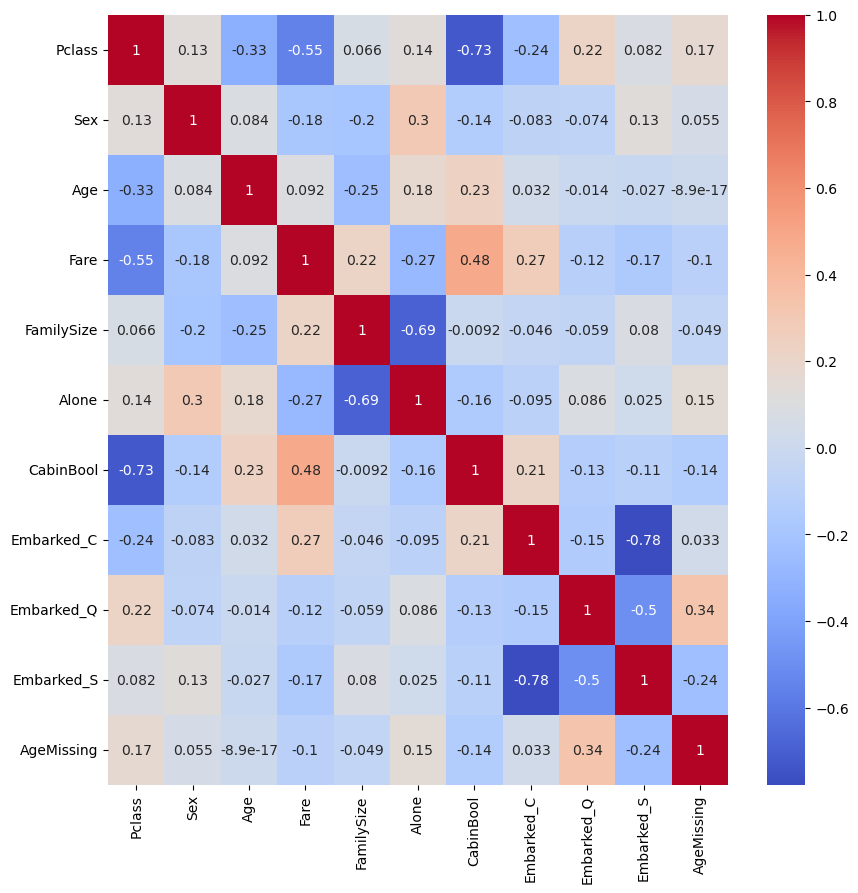

In [29]:
# Calculate correlation matrix
corr = train_df.drop("Survived", axis=1).corr()
# Plot heatmap of correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [30]:
# Define function to calculate MI scores
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

# Calculate MI scores
discrete_features = train_df.drop("Survived", axis=1).nunique() < 10
print("Is feature discrete or continuous?")
print(discrete_features)
mi_scores = make_mi_scores(train_df.drop("Survived", axis=1), train_df["Survived"], discrete_features)
mi_scores

Is feature discrete or continuous?
Pclass         True
Sex            True
Age           False
Fare          False
FamilySize     True
Alone          True
CabinBool      True
Embarked_C     True
Embarked_Q     True
Embarked_S     True
AgeMissing     True
dtype: bool


Sex           0.150870
Fare          0.129891
Pclass        0.058107
CabinBool     0.049270
FamilySize    0.047781
Age           0.033797
Alone         0.020593
Embarked_C    0.013803
Embarked_S    0.011925
AgeMissing    0.004371
Embarked_Q    0.000007
Name: MI Scores, dtype: float64

<Axes: xlabel='MI Scores', ylabel='None'>

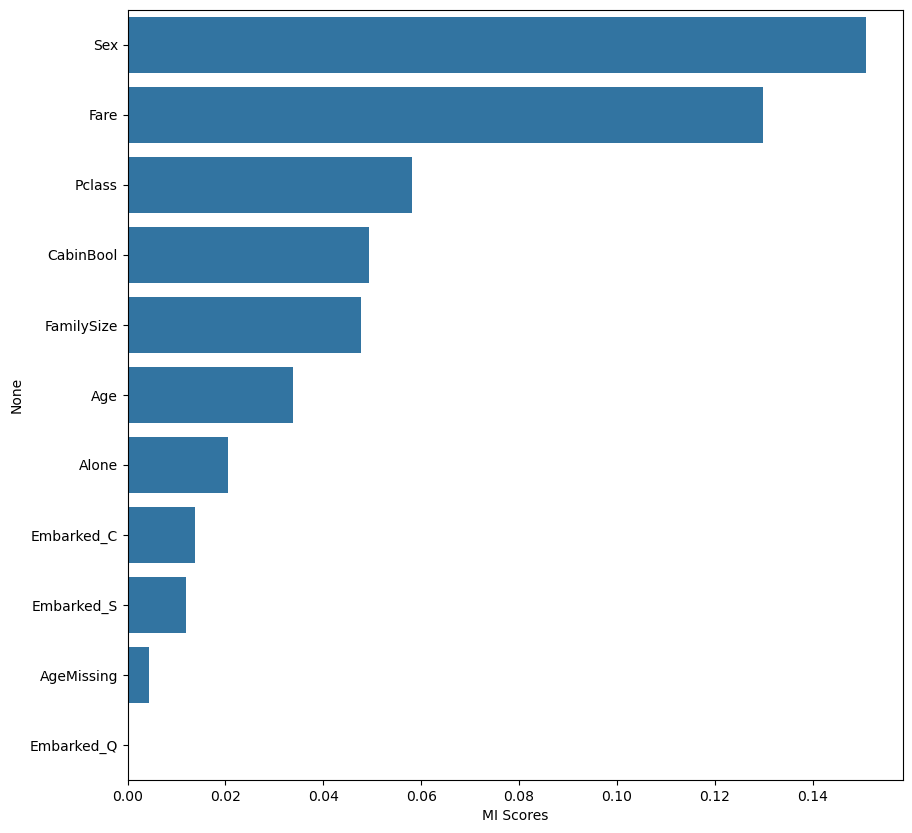

In [31]:
# Plot MI scores
plt.figure(figsize=(10, 10))
sns.barplot(x=mi_scores, y=mi_scores.index)

## 3. Train Model

First we need to do the following:
1. Dividing the data into features and labels.
2. Splitting the data into training and testing sets. Look at [this](https://illustrated-machine-learning.github.io/#/machine-learning-engineering/introduction#training-and-holdout-sets) for more information.

In [32]:
# Split data into features and target
X = train_df.drop("Survived", axis=1)
y = train_df["Survived"]
# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=42)
# Check shapes
print(f"X_train shape: {X_train.shape}")
print(f"X_valid shape: {X_valid.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_valid shape: {y_valid.shape}")


X_train shape: (668, 11)
X_valid shape: (223, 11)
y_train shape: (668,)
y_valid shape: (223,)


Define the training function

In [33]:
# Define training method
def train_model(model, x, y, model_name="", conf="", verbose=True): 
    # fit the model
    model.fit(x, y)
    # make predictions
    y_pred = model.predict(x)
    # get accuracy of predictions
    accuracy = accuracy_score(y, y_pred)
    if verbose:
        print(f"Model - {conf}")
        print(f"Train Accuracy: {accuracy}")

    return accuracy

Define methods for test and visualization of confusion matrix.

In [34]:
# Visualize confusion matrix
def visualize_confusion_martix(y, y_pred, confusion_matrix):
    cm = pd.DataFrame(confusion_matrix, index=y.unique(), columns=y.unique())
    # plot using seaborn
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Define testing method
def test_model(model, x, y, model_name="", conf="", verbose=True):
    # make predictions
    y_pred = model.predict(x)
    # get accuracy of predictions
    accuracy = accuracy_score(y, y_pred)
    # get confusion matrix
    cm = confusion_matrix(y, y_pred)
    # get precision, recall and f1 scores
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    if verbose:
        print(f"Model - {conf}")
        print(f"Test Accuracy: {accuracy}")
        visualize_confusion_martix(y, y_pred, cm)
        print(f"Precision: {precision}")
        print(f"Recall: {recall}")
        print(f"F1 Score: {f1}")

    return accuracy, precision, recall, f1

Train Linear Regression model

Model - 
Train Accuracy: 0.8068862275449101
Model - 
Test Accuracy: 0.8251121076233184


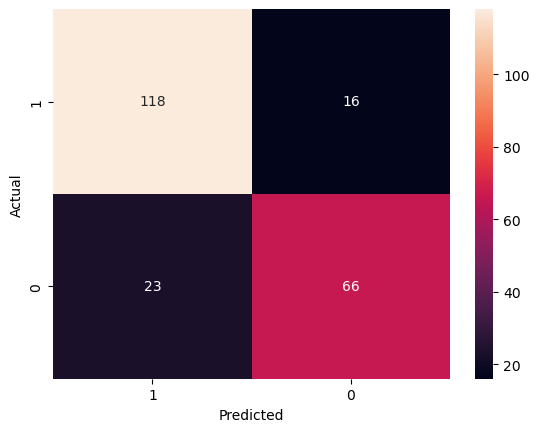

Precision: 0.8048780487804879
Recall: 0.7415730337078652
F1 Score: 0.7719298245614036


(0.8251121076233184,
 0.8048780487804879,
 0.7415730337078652,
 0.7719298245614036)

In [35]:
# Create Logistic regression model
model_lin_reg = LogisticRegression(random_state=42)
# Train Logistic regression model
train_model(model_lin_reg, X_train, y_train, "Logistic Regression")
# Test Logistic regression model
test_model(model_lin_reg, X_valid, y_valid, "Logistic Regression")


Train KNN model.

Model - 
Train Accuracy: 0.8562874251497006
Model - 
Test Accuracy: 0.8161434977578476


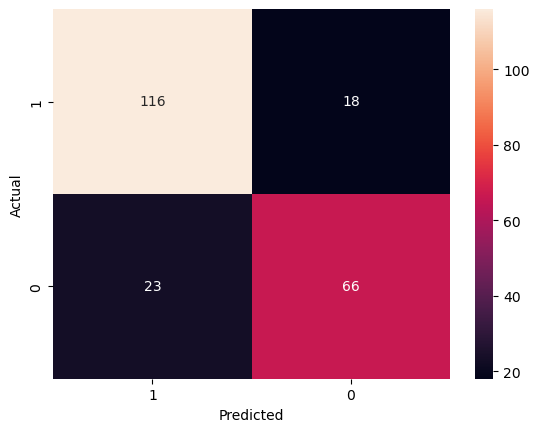

Precision: 0.7857142857142857
Recall: 0.7415730337078652
F1 Score: 0.7630057803468209


(0.8161434977578476,
 0.7857142857142857,
 0.7415730337078652,
 0.7630057803468209)

In [36]:
# Create KNN model
model_knn = KNeighborsClassifier()
# Train KNN model
train_model(model_knn, X_train, y_train, "KNN")
# Test KNN model
test_model(model_knn, X_valid, y_valid, "KNN")

Train Decision Tree model.

Model - 
Train Accuracy: 0.9835329341317365
Model - 
Test Accuracy: 0.7309417040358744


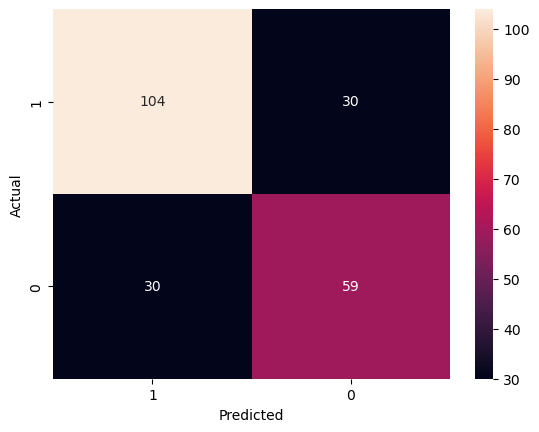

Precision: 0.6629213483146067
Recall: 0.6629213483146067
F1 Score: 0.6629213483146067


(0.7309417040358744,
 0.6629213483146067,
 0.6629213483146067,
 0.6629213483146067)

In [37]:
# Create Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)
# Train Decision Tree model
train_model(model_dt, X_train, y_train, "Decision Tree")
# Test Decision Tree model
test_model(model_dt, X_valid, y_valid, "Decision Tree")

Train Random Forest model.

Model - 
Train Accuracy: 0.9835329341317365
Model - 
Test Accuracy: 0.7937219730941704


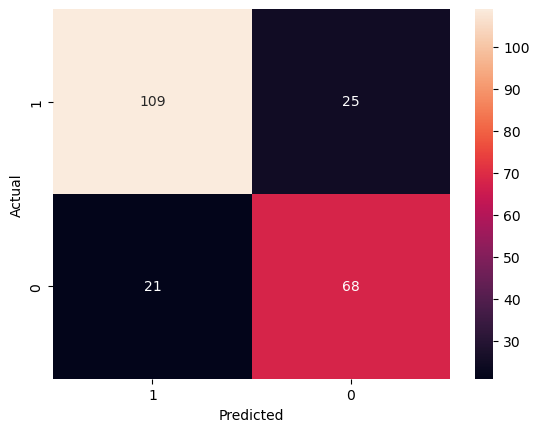

Precision: 0.7311827956989247
Recall: 0.7640449438202247
F1 Score: 0.7472527472527474


(0.7937219730941704,
 0.7311827956989247,
 0.7640449438202247,
 0.7472527472527474)

In [38]:
# Create Random Forest model
model_rf = RandomForestClassifier(random_state=42)
# Train Random Forest model
train_model(model_rf, X_train, y_train, "Random Forest")
# Test Random Forest model
test_model(model_rf, X_valid, y_valid, "Random Forest")

## 4. K-fold Cross Validation

In order to have more stable testing results we can use K-fold cross validation. Look at [this](https://illustrated-machine-learning.github.io/#/machine-learning/ml-sampling-resampling#resampling) for more information.

In [43]:
from sklearn.base import clone

# Create K fold cross validation method
def k_fold_cross_validation(model, X, y, k_folds=10, verbose=True):
    train_scores = []
    test_scores = []

    # YOUR CODE HERE
    kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

    for i, (train_index, valid_index) in enumerate(kf.split(X)):
        X_train, X_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]

        # reinitialize the model
        model = clone(model)

        train_acc = train_model(model, X_train, y_train, f"Random Forrest K-fold {i}", verbose=False)
        train_scores.append(train_acc)
        eval_metrics = test_model(model, X_valid, y_valid, f"Random Forrest K-fold {i}", verbose=False)
        test_scores.append(eval_metrics)

    mean_train_acc = np.mean(train_scores)
    mean_test_acc = np.mean([score[0] for score in test_scores])
    mean_test_precision = np.mean([score[1] for score in test_scores])
    mean_test_recall = np.mean([score[2] for score in test_scores])
    mean_test_f1 = np.mean([score[3] for score in test_scores])
    if verbose:
        print(f"Mean Train Accuracy: {mean_train_acc}")
        test_scores_df = pd.DataFrame(test_scores, columns=["Accuracy", "Precision", "Recall", "F1 Score"])
        print(f"Mean Test Accuracy: {mean_test_acc}")
        print(f"Mean Test Precision: {mean_test_precision}")
        print(f"Mean Test Recall: {mean_test_recall}")
        print(f"Mean Test F1 Score: {mean_test_f1}")
        print(test_scores_df)

    return mean_train_acc, mean_test_acc, mean_test_precision, mean_test_recall, mean_test_f1 


In [44]:
# Test K fold cross validation method on Random Forest model
model_rf = RandomForestClassifier(random_state=42)
k_fold_cross_validation(model_rf, X, y)

Mean Train Accuracy: 0.9874046158013206
Mean Test Accuracy: 0.7979151061173534
Mean Test Precision: 0.7370528852758851
Mean Test Recall: 0.7270307520439099
Mean Test F1 Score: 0.7306193645998535
   Accuracy  Precision    Recall  F1 Score
0  0.855556   0.794872  0.861111  0.826667
1  0.808989   0.783784  0.763158  0.773333
2  0.764045   0.735294  0.675676  0.704225
3  0.764045   0.655172  0.633333  0.644068
4  0.820225   0.761905  0.842105  0.800000
5  0.786517   0.709677  0.687500  0.698413
6  0.741573   0.666667  0.606061  0.634921
7  0.786517   0.750000  0.636364  0.688525
8  0.775281   0.763158  0.725000  0.743590
9  0.876404   0.750000  0.840000  0.792453


(0.9874046158013206,
 0.7979151061173534,
 0.7370528852758851,
 0.7270307520439099,
 0.7306193645998535)

## 5. Hyperparameter Tuning

Choose the best hyperparameters for the model. For information about hyperparameter tuning look at [this](https://illustrated-machine-learning.github.io/#/machine-learning/tuning).

In [45]:
# Fine-tune random forest model
max_depth = [5, 10, 30]
num_estimators = [50, 200, 500]
min_samples_split = [2, 5, 10]

best_model = None
best_score = 0
best_params = None

# YOUR CODE HERE
for depth in max_depth:
    for estimators in num_estimators:
        for split in min_samples_split:
            model = RandomForestClassifier(n_estimators=estimators, max_depth=depth, min_samples_split=split, random_state=42)
            train_acc, test_acc, test_precision, test_recall, test_f1_score = k_fold_cross_validation(model, X, y, k_folds=10, verbose=False)
            params = {"max_depth": depth, "num_estimators": estimators, "min_samples_split": split}
            print(f"Model - {params}")
            print(f"{train_acc}, {test_acc}, {test_precision}, {test_recall}, {test_f1_score}")
            if test_acc > best_score:
                best_score = test_acc
                best_params = params
                best_model = model


Model - {'max_depth': 5, 'num_estimators': 50, 'min_samples_split': 2}
0.8588357445960628, 0.8203870162297129, 0.81521702423033, 0.6914124764716869, 0.7448027733566112
Model - {'max_depth': 5, 'num_estimators': 50, 'min_samples_split': 5}
0.8588357445960628, 0.8203995006242197, 0.826009010036184, 0.6779490926333032, 0.7414024784821993
Model - {'max_depth': 5, 'num_estimators': 50, 'min_samples_split': 10}
0.8559668245117542, 0.8248938826466915, 0.8332149813136841, 0.6857124013966118, 0.7495687373843682
Model - {'max_depth': 5, 'num_estimators': 200, 'min_samples_split': 2}
0.8583371471446227, 0.8226342072409487, 0.8290537867150771, 0.680811883055304, 0.7437772407139305
Model - {'max_depth': 5, 'num_estimators': 200, 'min_samples_split': 5}
0.8579629266409506, 0.8215230961298378, 0.8317354910491306, 0.6776868830553041, 0.742824322360895
Model - {'max_depth': 5, 'num_estimators': 200, 'min_samples_split': 10}
0.8539721233744603, 0.819263420724095, 0.8299453688356213, 0.6681101286693392, 

In [46]:
print(f"Best Model - {best_params}")
print(f"Best Score - {best_score}")

Best Model - {'max_depth': 5, 'num_estimators': 50, 'min_samples_split': 10}
Best Score - 0.8248938826466915


Train the model with the best hyperparameters on whole training + validation set.

In [47]:
best_model = RandomForestClassifier(
    n_estimators=best_params["num_estimators"],
    max_depth=best_params["max_depth"],
    min_samples_split=best_params["min_samples_split"]
)
train_model(best_model, X, y, "Random Forest - Tuned", verbose=True)

Model - 
Train Accuracy: 0.8507295173961841


0.8507295173961841

## 6. Inference

Run the best trainined model on the test data and save to csv.

In [49]:
original_test_df = pd.read_csv('titanic_dataset/test.csv')
test_results_df = pd.DataFrame(original_test_df["PassengerId"])
test_results_df["Survived"] = best_model.predict(test_df)

# save results to csv file
test_results_df.to_csv("results.csv", index=False)
test_results_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
